# Importing / sense-checking

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Import the CSV file with Pandas.
data = pd.read_csv('Data/raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])

# View the DataFrame.
print(data.shape)
print(data.dtypes)
data

(29580, 4)
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
...,...,...,...,...
2019-07-25,2900,500000,unit,3
2019-07-25,2612,560000,unit,2
2019-07-26,2912,464950,unit,2


In [2]:
# Checking different values

data.nunique()

postcode          27
price           2554
propertyType       2
bedrooms           6
dtype: int64

In [3]:
# Checking for missing values

data.isna().sum()

# Dataset does not contain NA/s

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

<Axes: xlabel='datesold', ylabel='price'>

[]

Text(0.5, 1.0, 'House prices over time')

Text(0.5, 0, 'Date Sold')

Text(0, 0.5, 'Price')

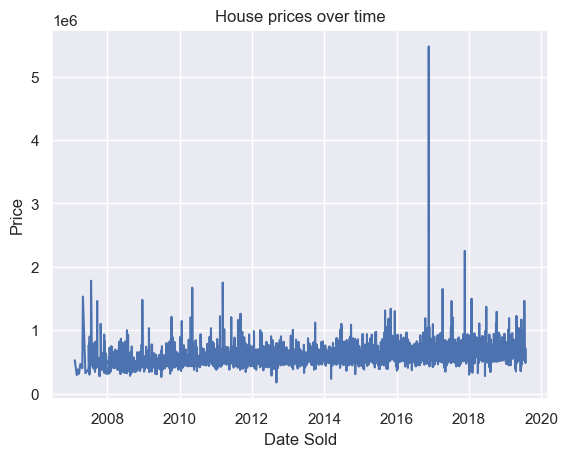

In [4]:
# Plotting house prices over time

prices_over_time = data.reset_index()
sns.lineplot(x='datesold', y='price', ci=False, data=prices_over_time)

plt.plot(figsize=(12, 4))
plt.title('House prices over time')
plt.xlabel('Date Sold')
plt.ylabel('Price')

<Axes: xlabel='bedrooms', ylabel='postcode'>

Text(0.5, 1.0, 'Count of bedrooms')

Text(0.5, 0, 'Number of bedrooms')

Text(0, 0.5, 'Bedroom count')

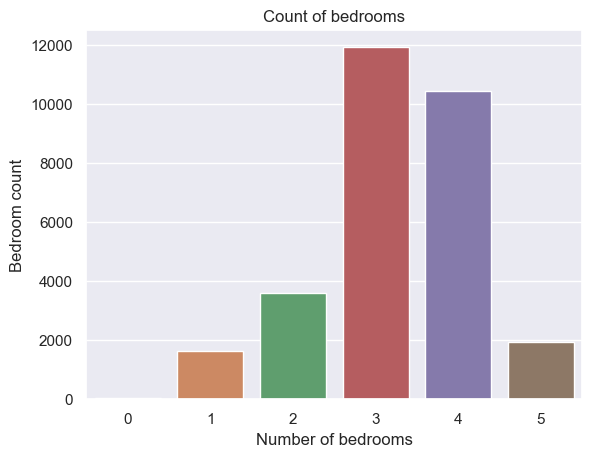

In [5]:
# Plotting bedroom count

bedroom_count = data.groupby('bedrooms').count().reset_index()
sns.barplot(x='bedrooms', y='postcode', data=bedroom_count)

plt.title('Count of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Bedroom count')

In [6]:
# Creating subsets for the different bedroom numbers

bedroom_0 = data[data['bedrooms'] == 0]
bedroom_1 = data[data['bedrooms'] == 1]
bedroom_2 = data[data['bedrooms'] == 2]
bedroom_3 = data[data['bedrooms'] == 3]
bedroom_4 = data[data['bedrooms'] == 4]
bedroom_5 = data[data['bedrooms'] == 5]


<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

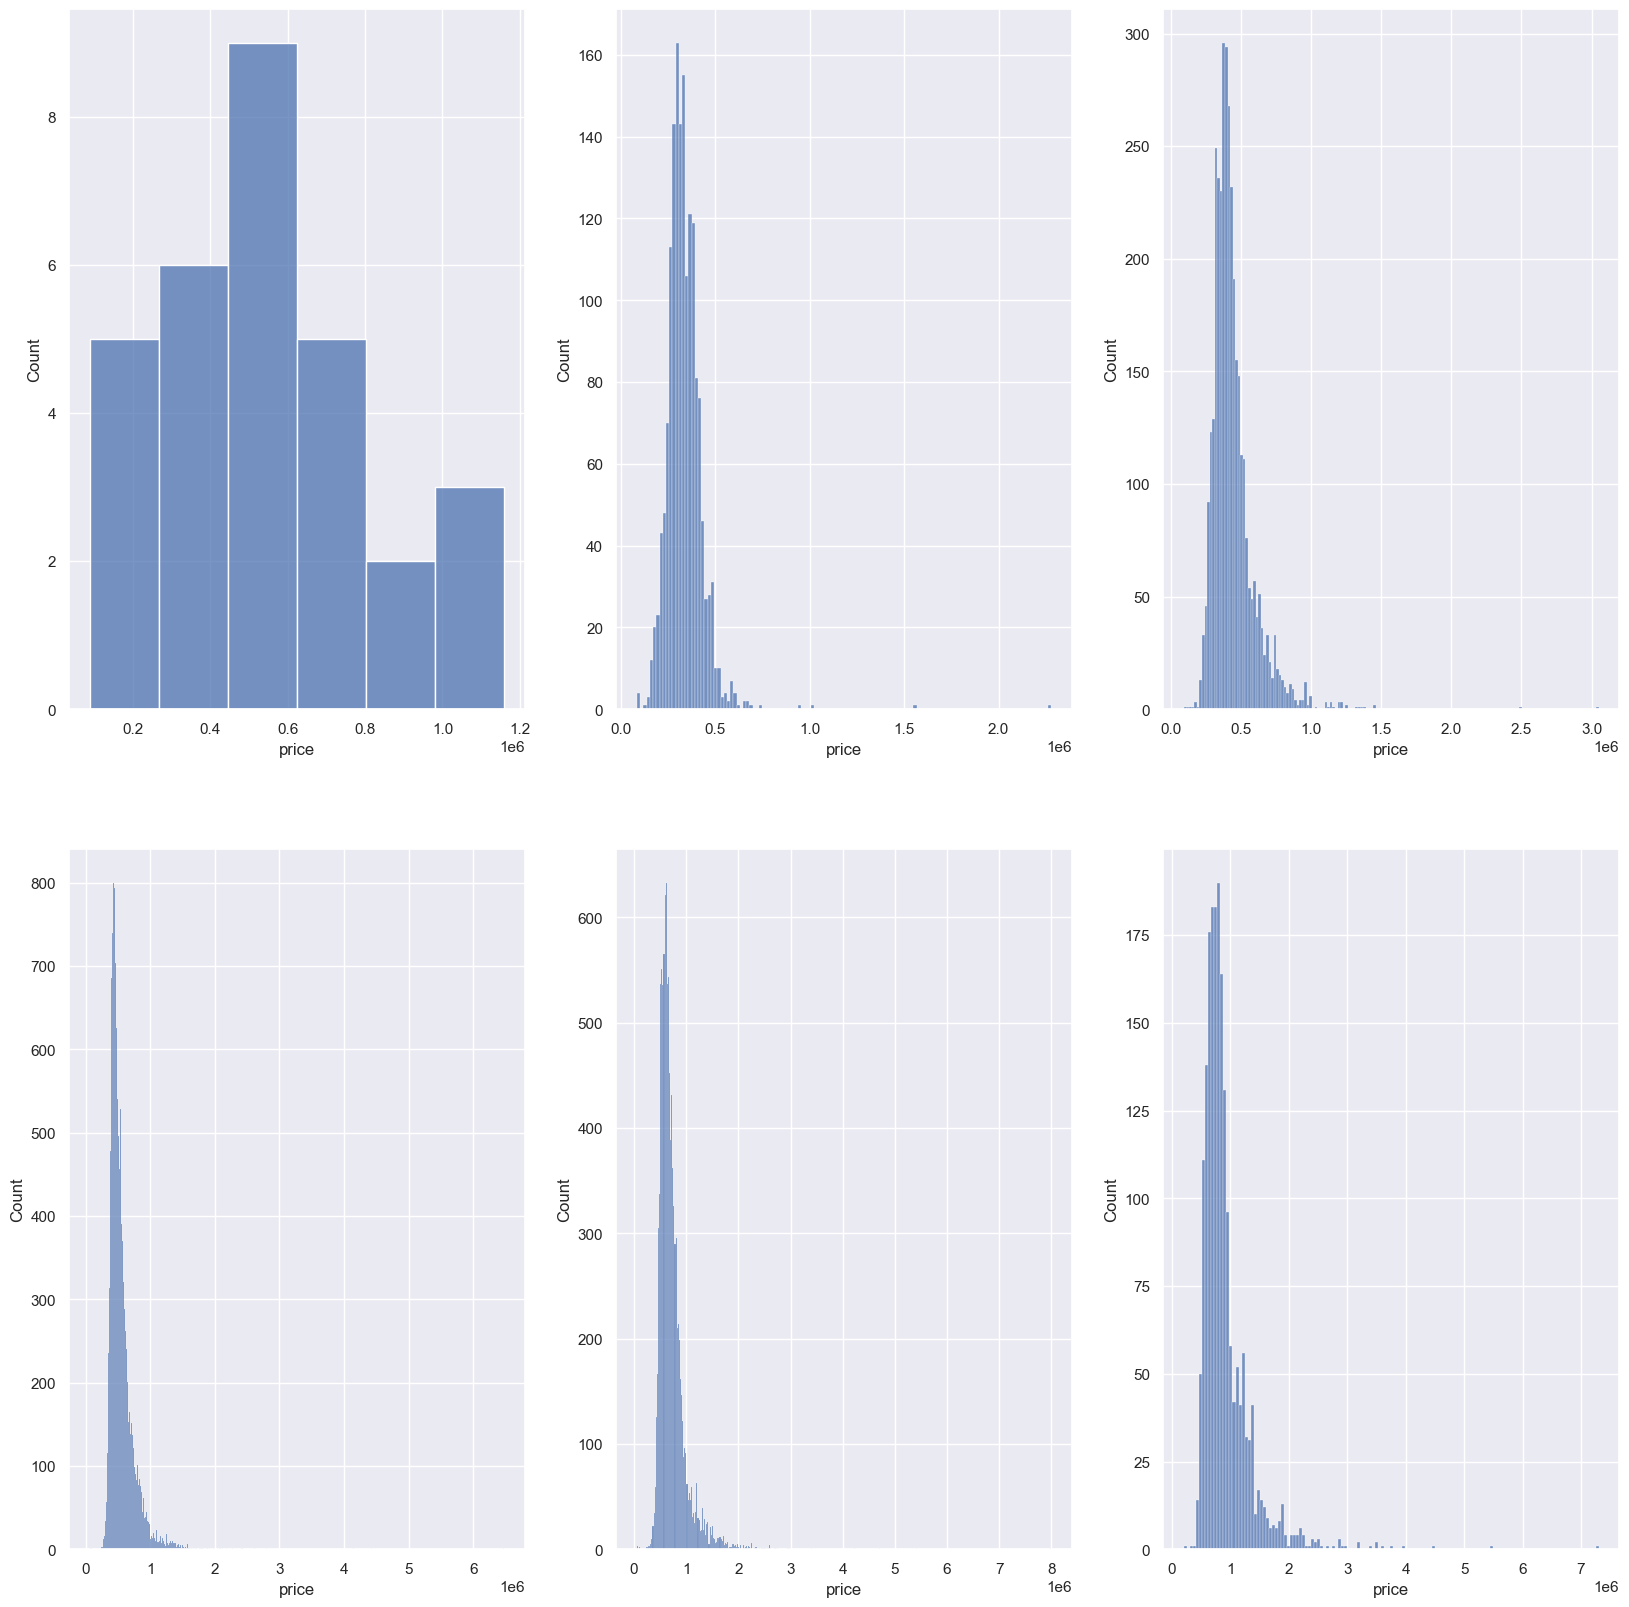

In [7]:
# Plotting 1-bedroom properties with a histogram

fig, axes = plt.subplots(2, 3, figsize=(20, 20))

sns.histplot(bedroom_0['price'], ax=axes[0, 0])
sns.histplot(bedroom_1['price'], ax=axes[0, 1])
sns.histplot(bedroom_2['price'], ax=axes[0, 2])
sns.histplot(bedroom_3['price'], ax=axes[1, 0])
sns.histplot(bedroom_4['price'], ax=axes[1, 1])
sns.histplot(bedroom_5['price'], ax=axes[1, 2])


# Analyzing spread of values 

<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

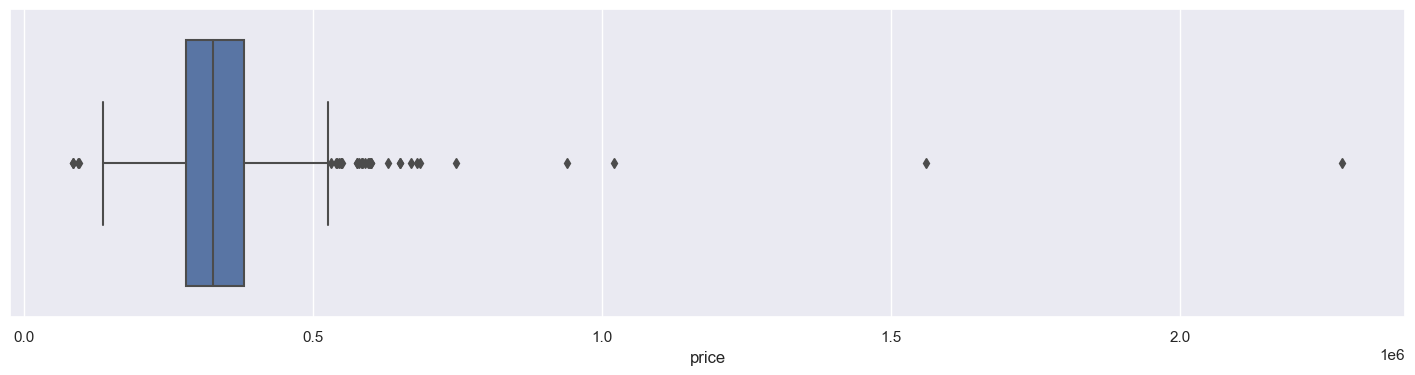

In [8]:
# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_1)


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

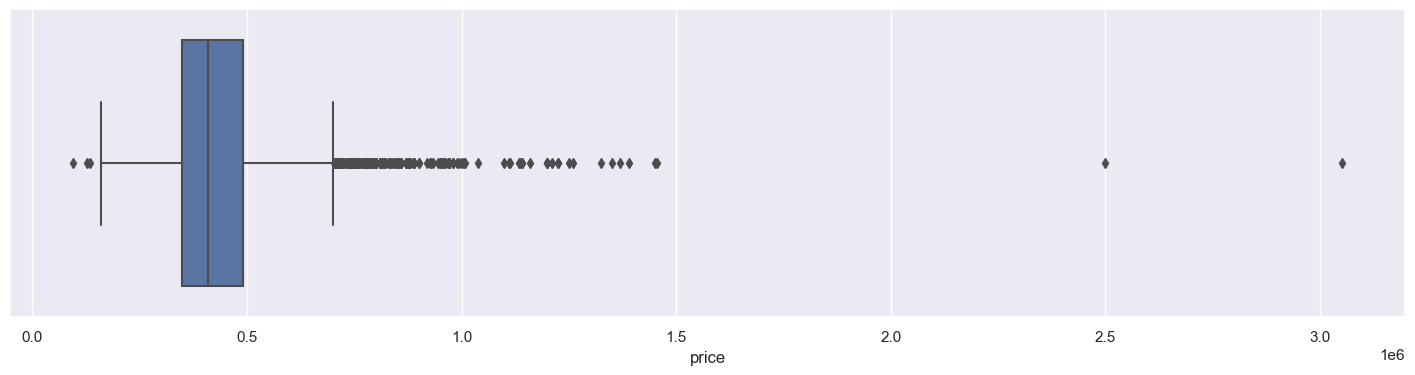

In [9]:
# Creating a boxplot to identify outliers for 2 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_2)


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

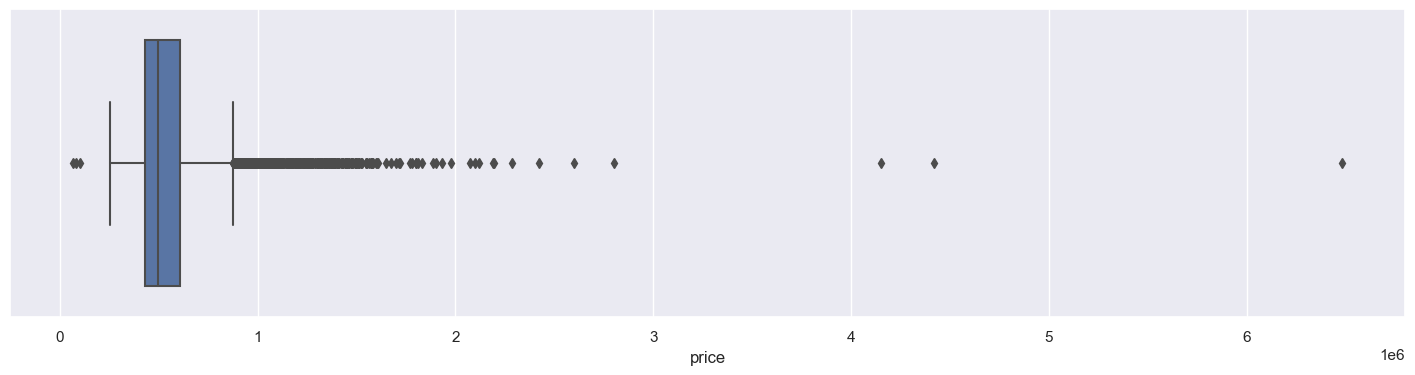

In [10]:
# Creating a boxplot to identify outliers for 3 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_3)


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

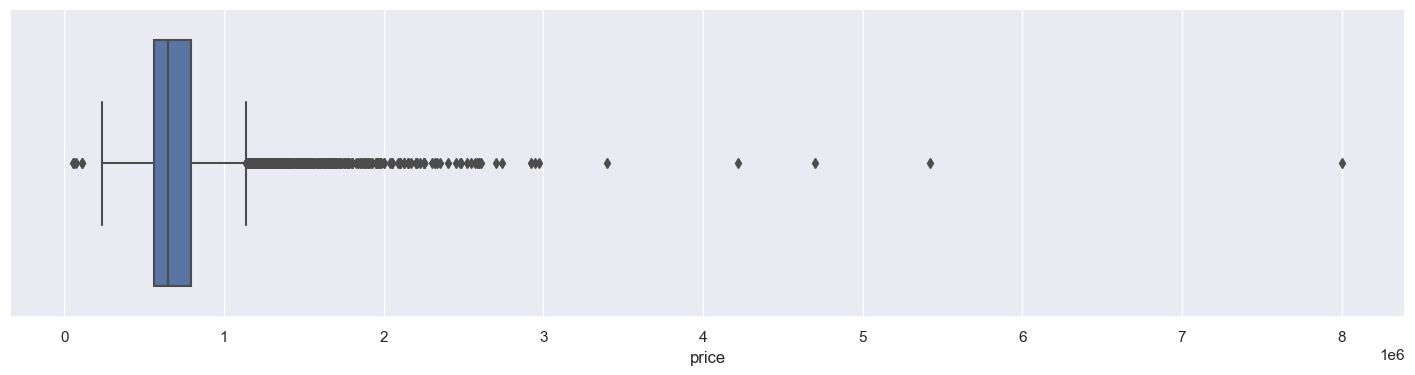

In [11]:
# Creating a boxplot to identify outliers for 4 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_4)


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

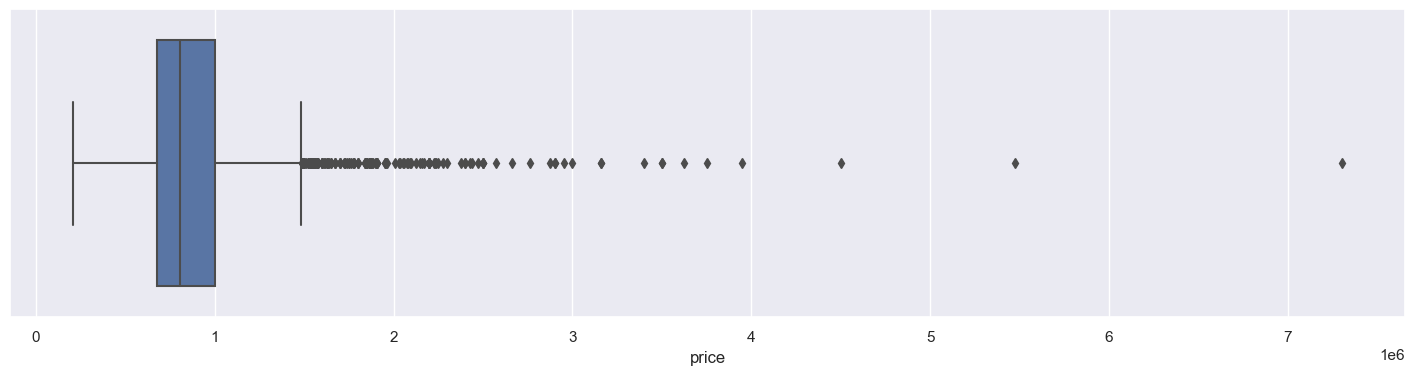

In [12]:
# Creating a boxplot to identify outliers for 5 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_5)


# Identifying and removing outliers

In [13]:
# Define function to filter out outliers
def remove_price_outlier(df):
    # Get prices
    prices = df['price']
    # calculate quartiles, IQR and limits
    q1 = prices.quantile(0.25)
    q3 = prices.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    
    # Filter dataset by limits
    df_filt = df[(prices > lower_limit) & (prices < upper_limit)]
    return df_filt

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-08,2600,327000,house,1
2007-10-15,2615,273000,house,1
2007-10-25,2602,135500,house,1
2007-11-29,2912,308000,house,1
2008-01-23,2601,380000,house,1
...,...,...,...,...
2019-07-19,2911,279000,unit,1
2019-07-23,2617,310000,unit,1
2019-07-25,2620,172500,unit,1


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

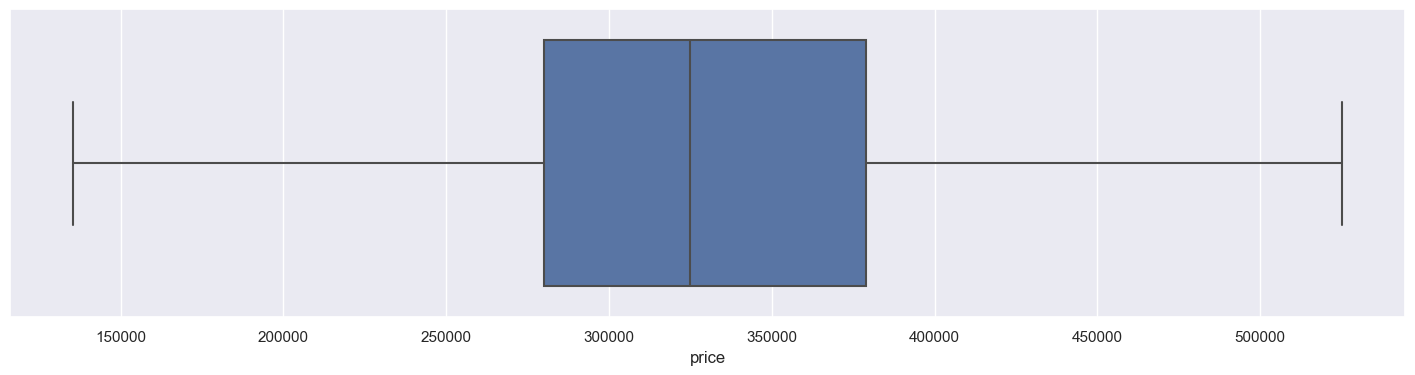

In [14]:
# Identifying and remmoving outliers: bedroom_1

bedroom_1_non_outlier = remove_price_outlier(bedroom_1)
bedroom_1_non_outlier

# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_1_non_outlier)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-08-28,2906,325000,house,2
2007-08-30,2905,315000,house,2
2007-11-08,2602,497000,house,2
2007-11-12,2611,465000,house,2
2007-12-14,2602,259000,house,2
...,...,...,...,...
2019-07-25,2603,297500,unit,2
2019-07-25,2612,475000,unit,2
2019-07-25,2612,560000,unit,2


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

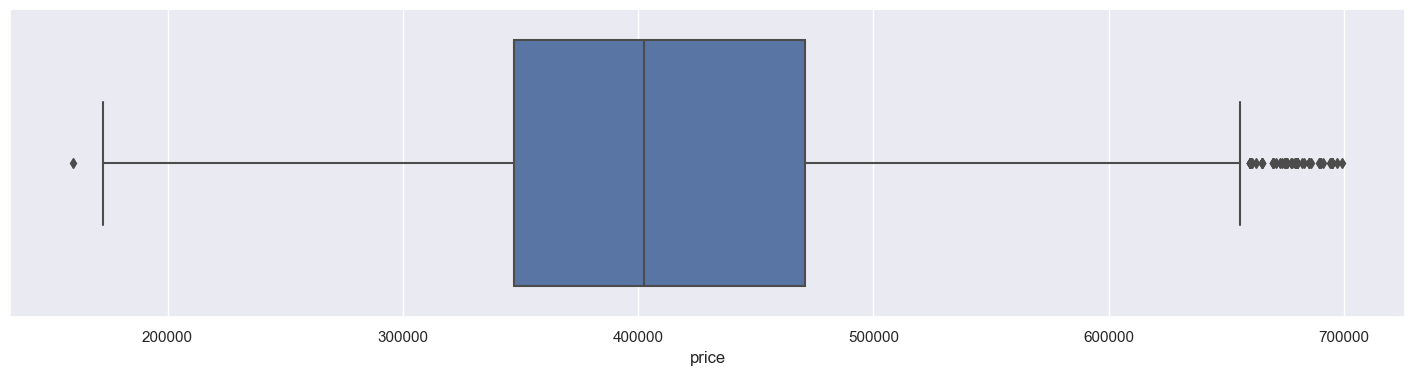

In [15]:
# Identifying and removing outliers: bedroom_2

bedroom_2_non_outlier = remove_price_outlier(bedroom_2)
bedroom_2_non_outlier

# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_2_non_outlier)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-21,2906,310000,house,3
2007-04-24,2607,399000,house,3
2007-05-24,2902,359000,house,3
...,...,...,...,...
2019-07-04,2617,457500,unit,3
2019-07-18,2601,560000,unit,3
2019-07-23,2914,450000,unit,3


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

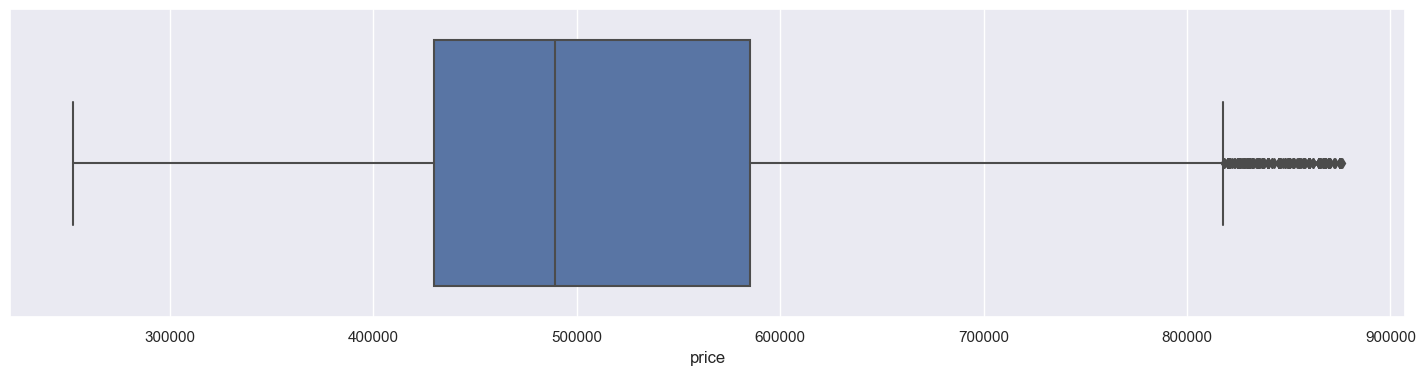

In [16]:
# Identifying and removing outliers: bedroom_3

bedroom_3_non_outlier = remove_price_outlier(bedroom_3)
bedroom_3_non_outlier

# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_3_non_outlier)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-03-09,2905,380000,house,4
2007-04-04,2905,465000,house,4
2007-06-27,2612,850000,house,4
2007-06-28,2904,765000,house,4
...,...,...,...,...
2017-12-13,2612,680000,unit,4
2018-02-05,2905,535000,unit,4
2018-03-13,2905,645000,unit,4


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

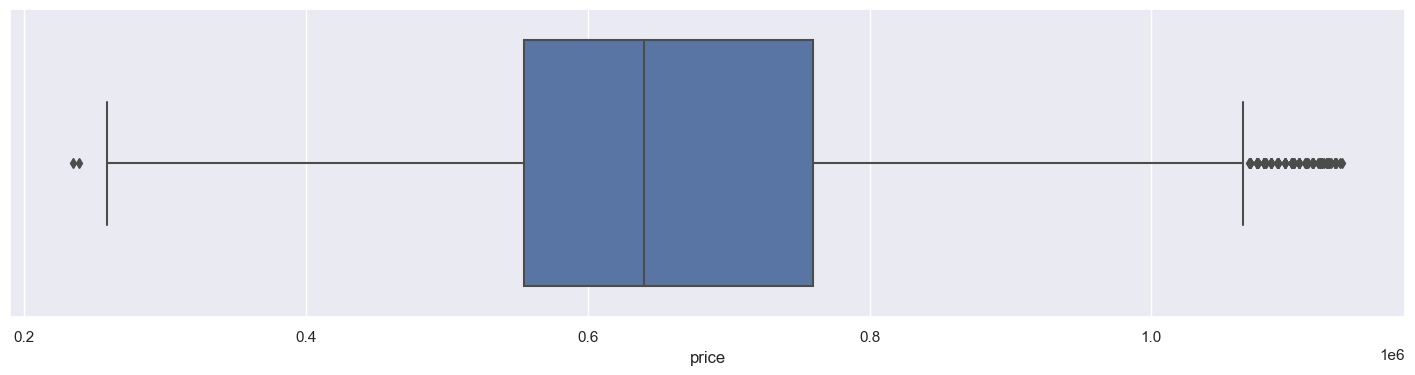

In [17]:
# Identifying and removing outliers: bedroom_4

bedroom_4_non_outlier = remove_price_outlier(bedroom_4)
bedroom_4_non_outlier

# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_4_non_outlier)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-02,2914,800000,house,5
2007-07-06,2615,535000,house,5
2007-08-07,2904,815000,house,5
2007-08-21,2902,418000,house,5
2007-09-21,2603,1460000,house,5
...,...,...,...,...
2019-07-19,2614,1150000,house,5
2019-07-23,2905,700000,house,5
2019-07-27,2905,865000,house,5


<Figure size 1800x400 with 0 Axes>

<Axes: xlabel='price'>

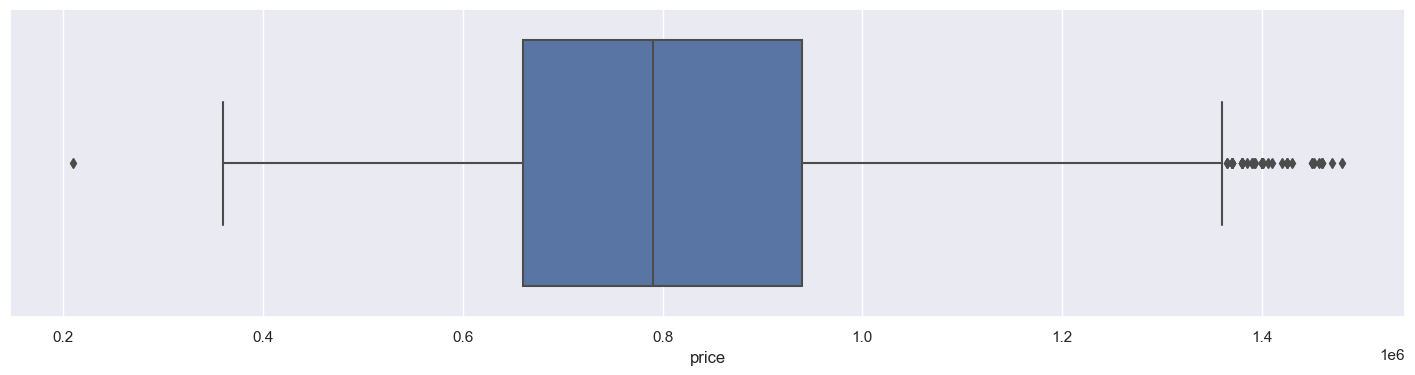

In [18]:
# Identifying and removing outliers: bedroom_5

bedroom_5_non_outlier = remove_price_outlier(bedroom_5)
bedroom_5_non_outlier

# Creating a boxplot to identify outliers for 1 bedroom

plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=bedroom_5_non_outlier)


# Time-series-Forecasting: 1 Bedroom

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-08,2600,327000,house,1
2007-10-15,2615,273000,house,1
2007-10-25,2602,135500,house,1
2007-11-29,2912,308000,house,1
2008-01-23,2601,380000,house,1
...,...,...,...,...
2019-07-19,2911,279000,unit,1
2019-07-23,2617,310000,unit,1
2019-07-25,2620,172500,unit,1


<Axes: xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 1 bedroom')

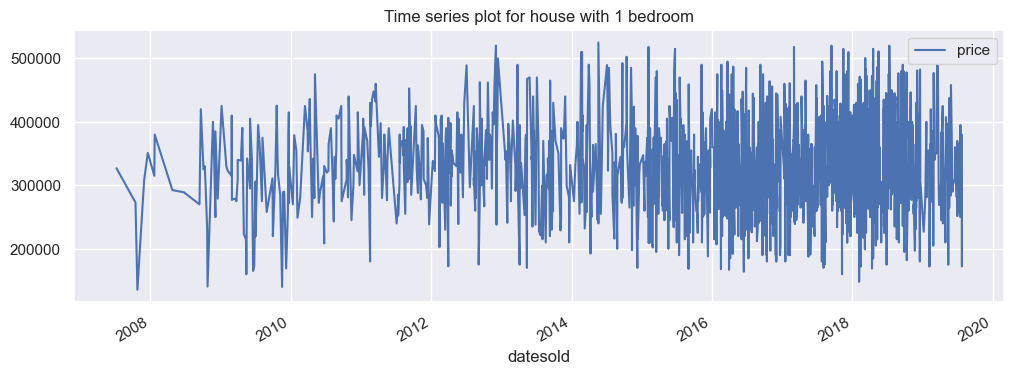

In [19]:
# Creating a time series for house prices 1 bedroom

bedroom_1_non_outlier

bedroom_1_non_outlier['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 1 bedroom')
plt.show(block=False)

postcode    8
price       8
bedrooms    8
dtype: int64

postcode    0
price       0
bedrooms    0
dtype: int64

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='datesold', ylabel='price'>

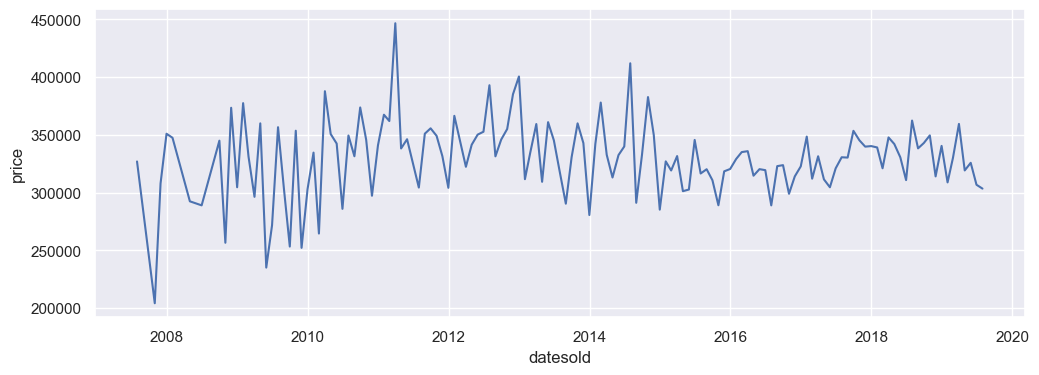

In [20]:
# Resampling the dataset

bedroom_1_res = bedroom_1_non_outlier.resample('M').mean()
bedroom_1_res.isna().sum()

# Drop the missing values. 
bedroom_1_res.dropna(inplace= True)
bedroom_1_res.isna().sum()


# Plot the time series data.

plt.figure(figsize=(12, 4))
sns.lineplot(x='datesold', y='price', data=bedroom_1_res)


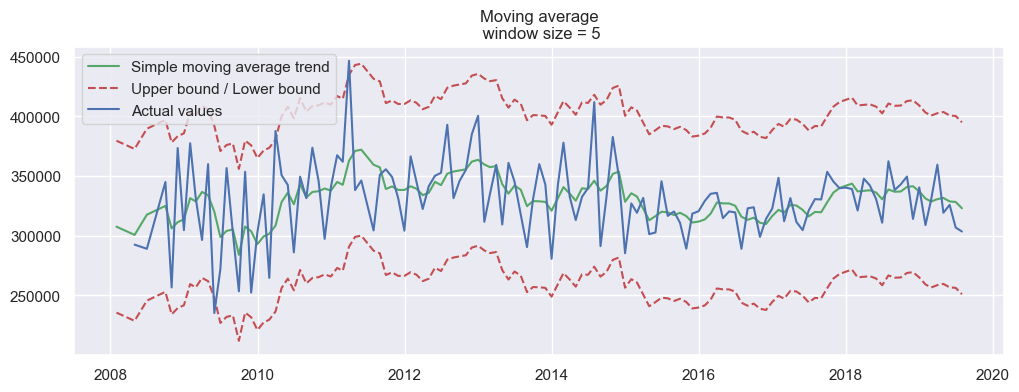

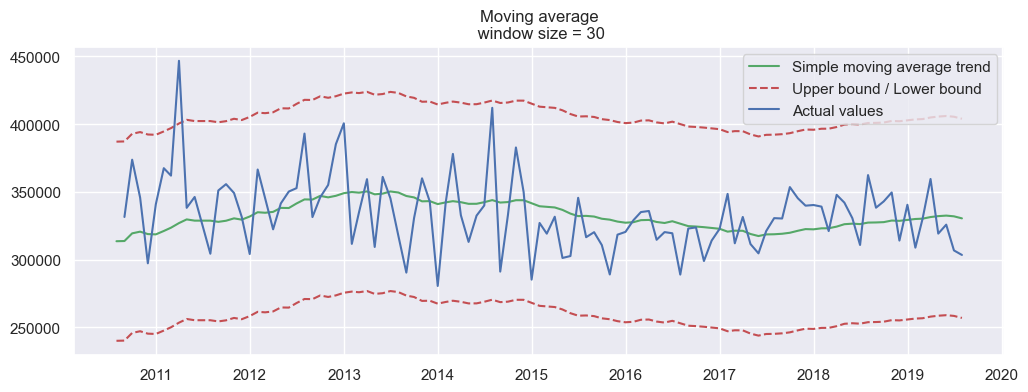

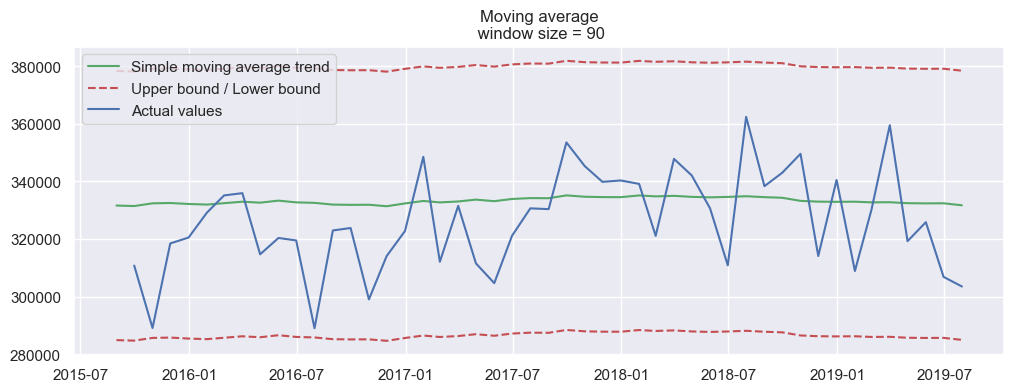

In [21]:
# Discussed in tutorial video
# Function to calculate and plot the simple moving average 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Five data point smoothing
plot_moving_average(bedroom_1_res.price, 5, plot_intervals=True)

# 30 data point smoothing
plot_moving_average(bedroom_1_res.price, 30, plot_intervals=True)

# 90 data point smoothing
plot_moving_average(bedroom_1_res.price, 90, plot_intervals=True)

# Time-series-Forecasting: 2 Bedroom

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-08-28,2906,325000,house,2
2007-08-30,2905,315000,house,2
2007-11-08,2602,497000,house,2
2007-11-12,2611,465000,house,2
2007-12-14,2602,259000,house,2
...,...,...,...,...
2019-07-25,2603,297500,unit,2
2019-07-25,2612,475000,unit,2
2019-07-25,2612,560000,unit,2


<Axes: xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 2 bedroom')

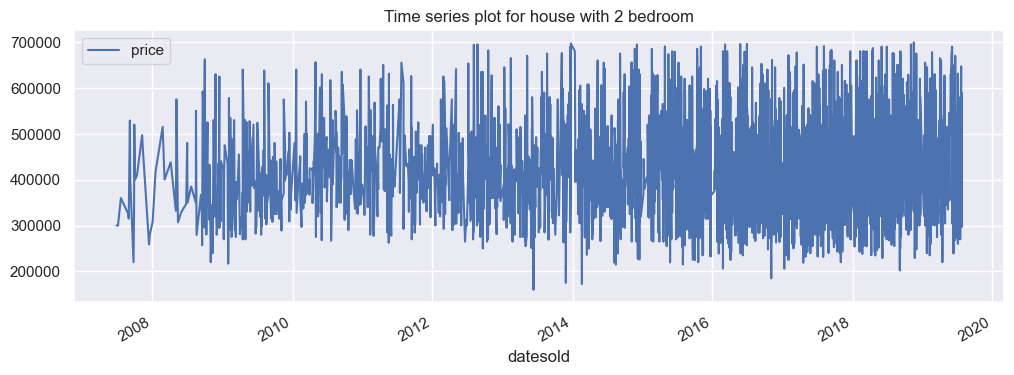

In [22]:
# Creating a time series for house prices 2 bedroom

bedroom_2_non_outlier

bedroom_2_non_outlier['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 2 bedroom')
plt.show(block=False)

postcode    0
price       0
bedrooms    0
dtype: int64

postcode    0
price       0
bedrooms    0
dtype: int64

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='datesold', ylabel='price'>

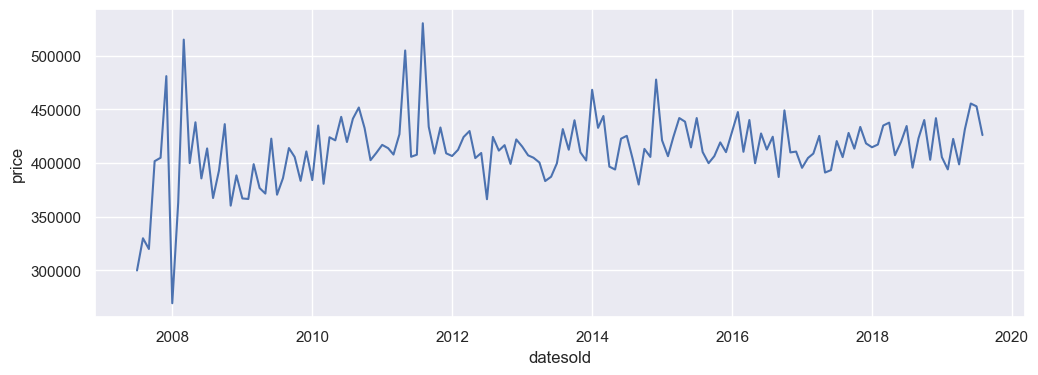

In [23]:
# Resampling the dataset

bedroom_2_res = bedroom_2_non_outlier.resample('M').mean()
bedroom_2_res.isna().sum()

# Drop the missing values. 
bedroom_2_res.dropna(inplace= True)
bedroom_2_res.isna().sum()


# Plot the time series data.

plt.figure(figsize=(12, 4))
sns.lineplot(x='datesold', y='price', data=bedroom_2_res)


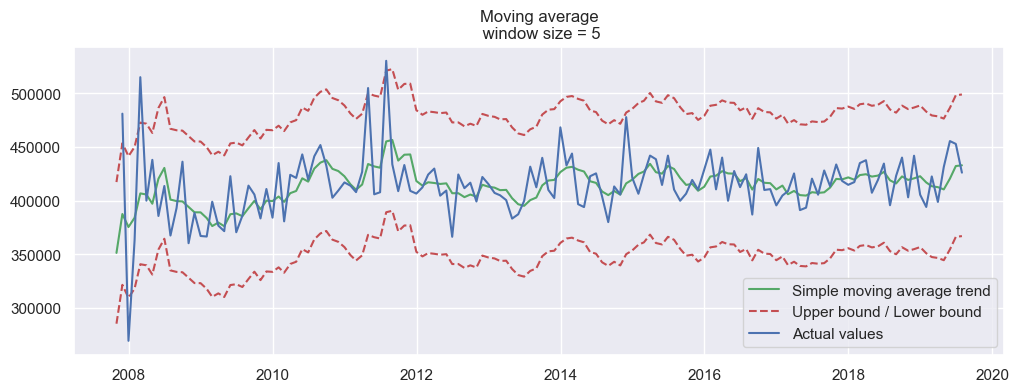

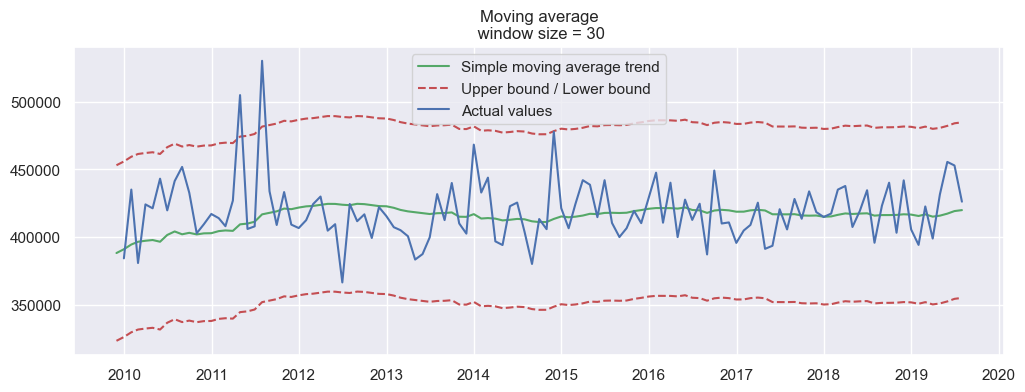

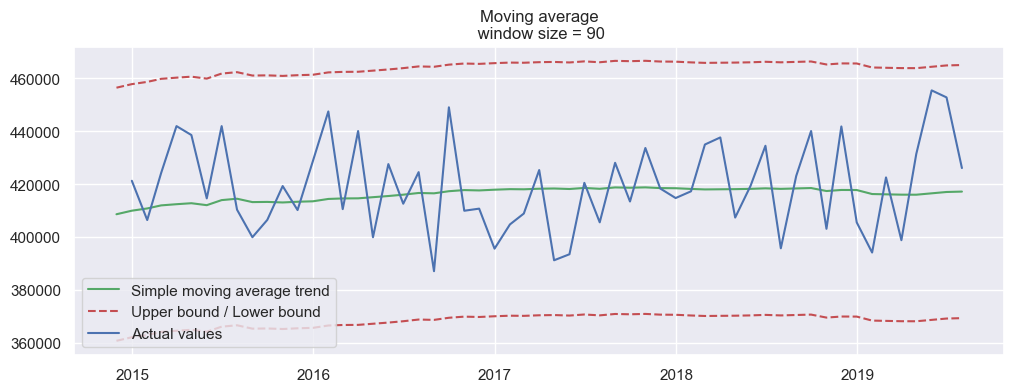

In [24]:
# Discussed in tutorial video
# Function to calculate and plot the simple moving average 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Five data point
plot_moving_average(bedroom_2_res.price, 5, plot_intervals=True)

# 30 data point smoothing
plot_moving_average(bedroom_2_res.price, 30, plot_intervals=True)

# 90 data point smoothing
plot_moving_average(bedroom_2_res.price, 90, plot_intervals=True)

# Time-series-Forecasting: 3 Bedroom


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-21,2906,310000,house,3
2007-04-24,2607,399000,house,3
2007-05-24,2902,359000,house,3
...,...,...,...,...
2019-07-04,2617,457500,unit,3
2019-07-18,2601,560000,unit,3
2019-07-23,2914,450000,unit,3


<Axes: xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 3 bedrooms')

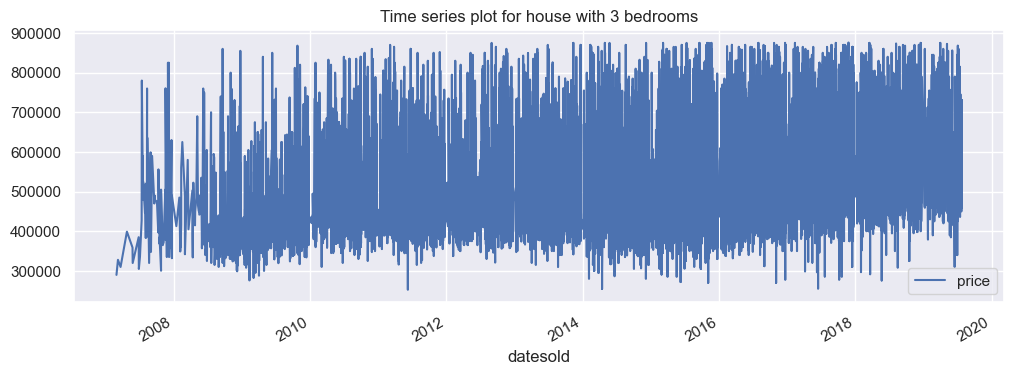

In [25]:
# Creating a time series for house prices 3 bedroom

bedroom_3_non_outlier

bedroom_3_non_outlier['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 3 bedrooms')
plt.show(block=False)

postcode    0
price       0
bedrooms    0
dtype: int64

postcode    0
price       0
bedrooms    0
dtype: int64

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='datesold', ylabel='price'>

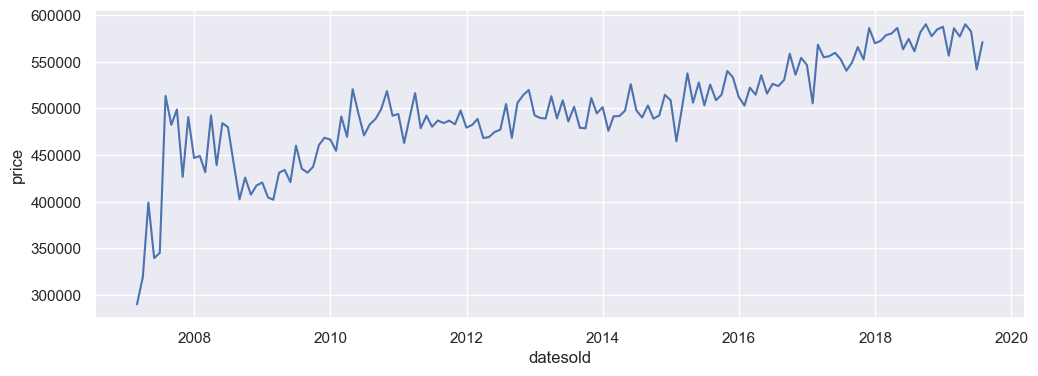

In [26]:
# Resampling the dataset

bedroom_3_res = bedroom_3_non_outlier.resample('M').mean()
bedroom_3_res.isna().sum()

# Drop the missing values. 
bedroom_3_res.dropna(inplace= True)
bedroom_3_res.isna().sum()


# Plot the time series data.

plt.figure(figsize=(12, 4))
sns.lineplot(x='datesold', y='price', data=bedroom_3_res)


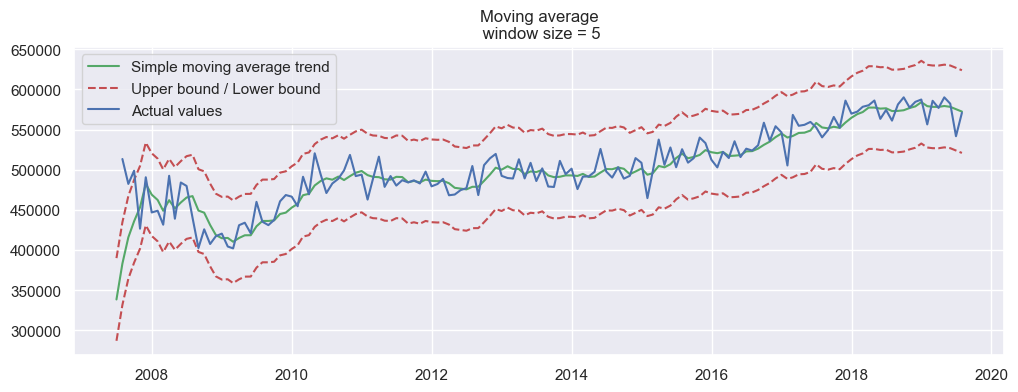

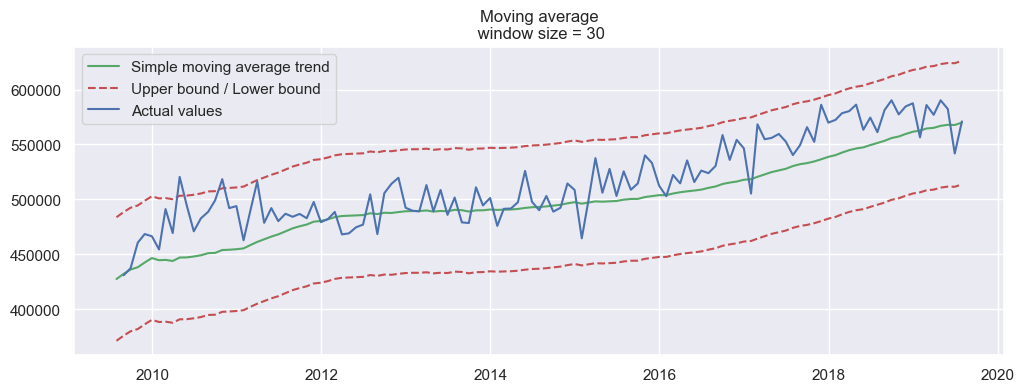

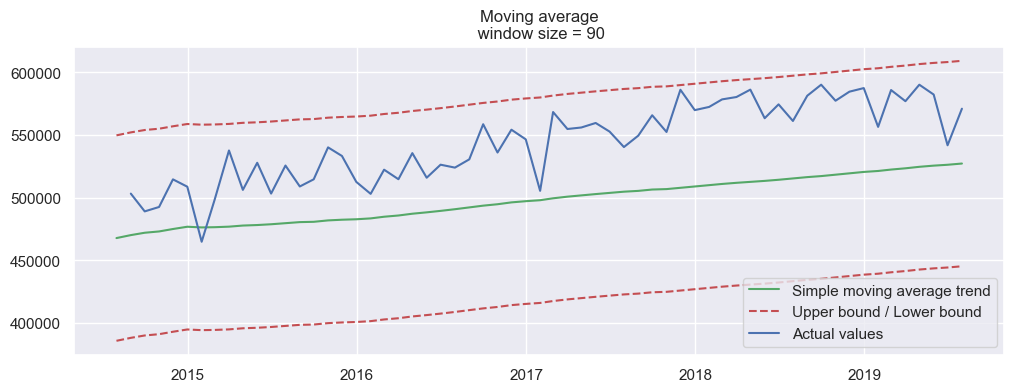

In [27]:
# Discussed in tutorial video
# Function to calculate and plot the simple moving average 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Five data point
plot_moving_average(bedroom_3_res.price, 5, plot_intervals=True)

# 30 data point smoothing
plot_moving_average(bedroom_3_res.price, 30, plot_intervals=True)

# 90 data point smoothing
plot_moving_average(bedroom_3_res.price, 90, plot_intervals=True)

# Time-series-Forecasting: 4 Bedroom


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-03-09,2905,380000,house,4
2007-04-04,2905,465000,house,4
2007-06-27,2612,850000,house,4
2007-06-28,2904,765000,house,4
...,...,...,...,...
2017-12-13,2612,680000,unit,4
2018-02-05,2905,535000,unit,4
2018-03-13,2905,645000,unit,4


<Axes: xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 3 bedrooms')

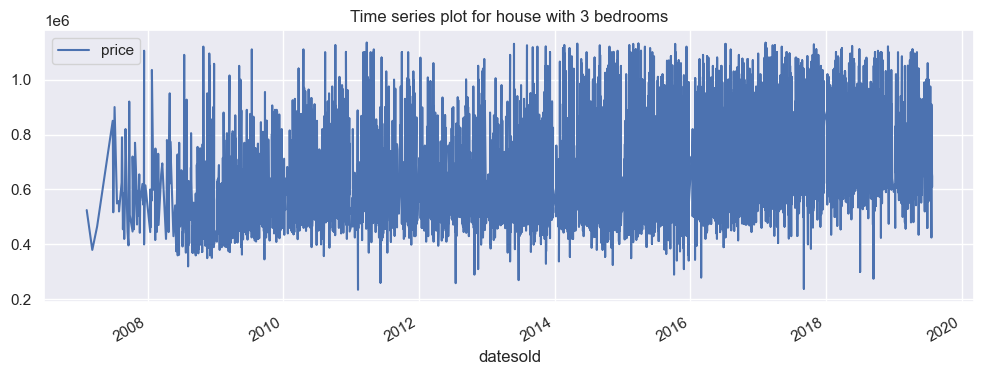

In [28]:
# Creating a time series for house prices 4 bedrooms

bedroom_4_non_outlier

bedroom_4_non_outlier['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 3 bedrooms')
plt.show(block=False)

postcode    1
price       1
bedrooms    1
dtype: int64

postcode    0
price       0
bedrooms    0
dtype: int64

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='datesold', ylabel='price'>

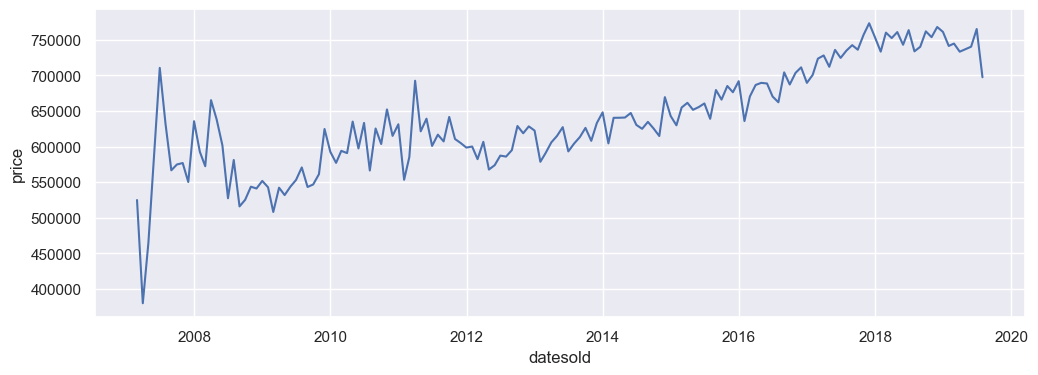

In [29]:
# Resampling the dataset

bedroom_4_res = bedroom_4_non_outlier.resample('M').mean()
bedroom_4_res.isna().sum()

# Drop the missing values. 
bedroom_4_res.dropna(inplace= True)
bedroom_4_res.isna().sum()


# Plot the time series data.

plt.figure(figsize=(12, 4))
sns.lineplot(x='datesold', y='price', data=bedroom_4_res)


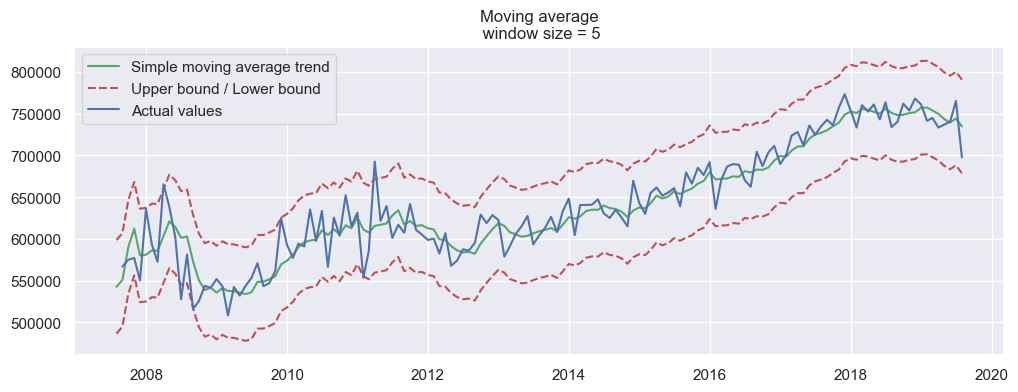

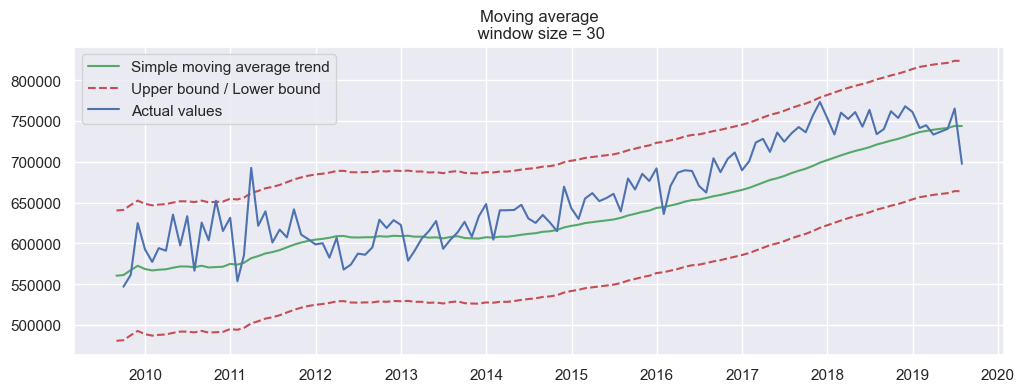

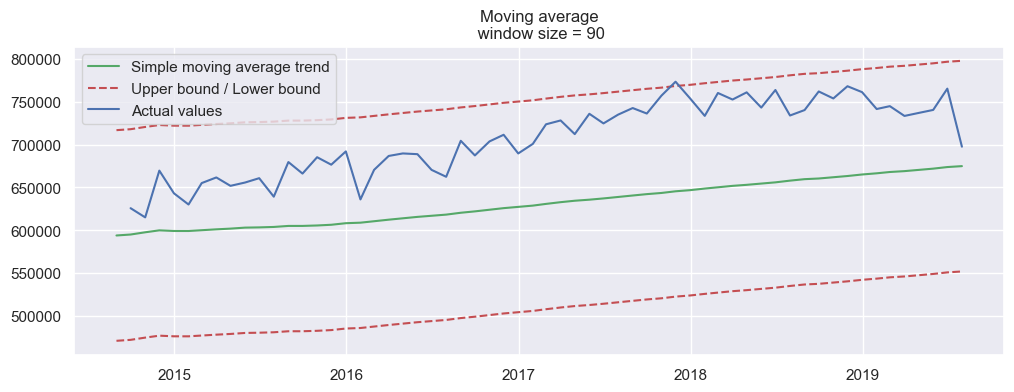

In [30]:
# Discussed in tutorial video
# Function to calculate and plot the simple moving average 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Five data point
plot_moving_average(bedroom_4_res.price, 5, plot_intervals=True)

# 30 data point smoothing
plot_moving_average(bedroom_4_res.price, 30, plot_intervals=True)

# 90 data point smoothing
plot_moving_average(bedroom_4_res.price, 90, plot_intervals=True)

# Time-series-Forecasting: 5 Bedroom


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-07-02,2914,800000,house,5
2007-07-06,2615,535000,house,5
2007-08-07,2904,815000,house,5
2007-08-21,2902,418000,house,5
2007-09-21,2603,1460000,house,5
...,...,...,...,...
2019-07-19,2614,1150000,house,5
2019-07-23,2905,700000,house,5
2019-07-27,2905,865000,house,5


<Axes: xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 5 bedrooms')

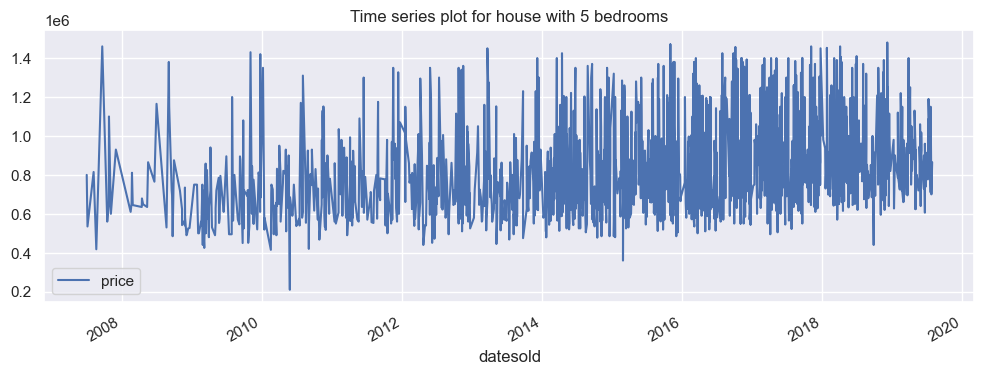

In [31]:
# Creating a time series for house prices 5 bedrooms

bedroom_5_non_outlier

bedroom_5_non_outlier['price'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 5 bedrooms')
plt.show(block=False)

postcode    3
price       3
bedrooms    3
dtype: int64

postcode    0
price       0
bedrooms    0
dtype: int64

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='datesold', ylabel='price'>

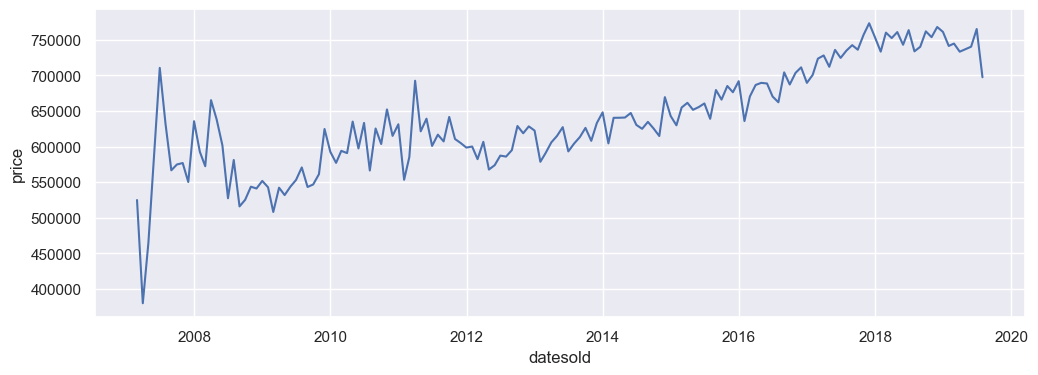

In [32]:
# Resampling the dataset

bedroom_5_res = bedroom_5_non_outlier.resample('M').mean()
bedroom_5_res.isna().sum()

# Drop the missing values. 
bedroom_5_res.dropna(inplace= True)
bedroom_5_res.isna().sum()


# Plot the time series data.

plt.figure(figsize=(12, 4))
sns.lineplot(x='datesold', y='price', data=bedroom_4_res)


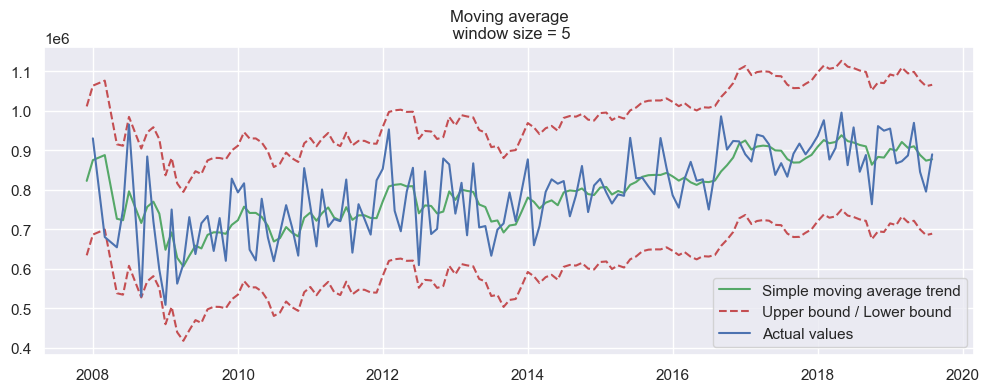

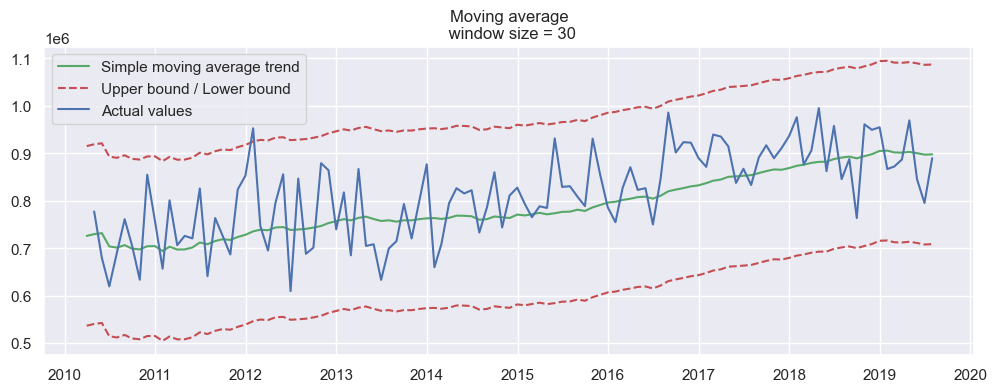

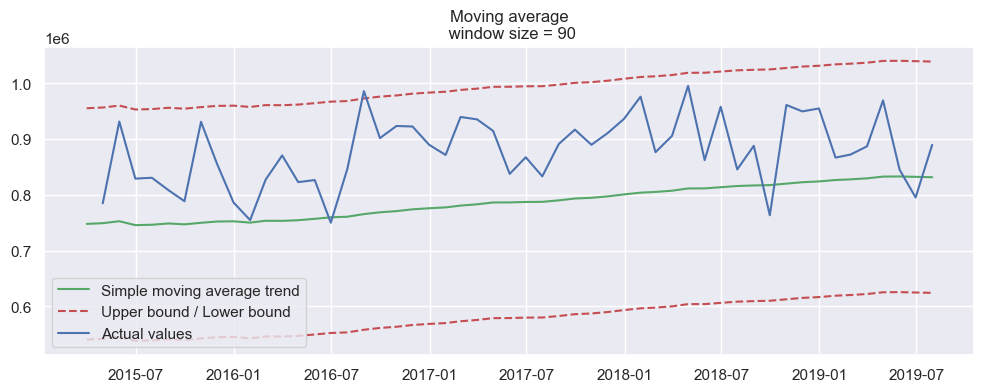

In [33]:
# Discussed in tutorial video
# Function to calculate and plot the simple moving average 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Five data point
plot_moving_average(bedroom_5_res.price, 5, plot_intervals=True)

# 30 data point smoothing
plot_moving_average(bedroom_5_res.price, 30, plot_intervals=True)

# 90 data point smoothing
plot_moving_average(bedroom_5_res.price, 90, plot_intervals=True)